In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os

In [2]:
train_path = r'C:\Users\dariu\Jupyter Notebook\Sign Language Detection\asl_alphabet_train\asl_alphabet_train'

filename_list = []
image_list = []
label_list = []
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']
for label in labels:
    for filename in os.listdir(train_path+f'\\{label}'):
        file_path = train_path+f'\\{label}'+f'\\{filename}'
        letter = label
        image = cv2.imread(file_path)
        filename_list.append(filename)
        image_list.append(image)
        label_list.append(letter)

In [3]:
len(filename_list)

84000

In [4]:
len(image_list)

84000

In [5]:
len(label_list)

84000

In [6]:
(image_list[0]).shape

(200, 200, 3)

In [7]:
filename

'space999.jpg'

In [8]:
meta_data = pd.DataFrame({'filename':filename_list, 'label':label_list, 'image':image_list})
print(meta_data.shape)
meta_data.head()

(84000, 3)


,filename,label,image
0,A1.jpg,A,"[[[252, 2, 1], [248, 0, 1], [249, 0, 10], [245..."
1,A10.jpg,A,"[[[252, 6, 0], [248, 2, 0], [243, 0, 4], [242,..."
2,A100.jpg,A,"[[[253, 8, 0], [249, 2, 0], [250, 0, 5], [246,..."
3,A1000.jpg,A,"[[[254, 7, 0], [251, 3, 0], [247, 0, 5], [243,..."
4,A1001.jpg,A,"[[[254, 3, 0], [253, 2, 0], [249, 0, 5], [248,..."


In [9]:
meta_data =meta_data.sample(frac=1).reset_index(drop=True)
meta_data.head()

,filename,label,image
0,T11.jpg,T,"[[[253, 1, 0], [253, 4, 0], [247, 0, 2], [243,..."
1,E1047.jpg,E,"[[[255, 5, 0], [253, 3, 0], [249, 0, 2], [248,..."
2,A2135.jpg,A,"[[[251, 3, 0], [245, 0, 0], [243, 2, 5], [241,..."
3,P2945.jpg,P,"[[[251, 0, 0], [252, 0, 1], [252, 0, 8], [251,..."
4,Y1026.jpg,Y,"[[[251, 0, 0], [255, 8, 4], [240, 0, 2], [242,..."


In [10]:
def preprocess_image(image):
    image = cv2.resize(image, (64,64))
    image = image.reshape(64,64,3)
    image = image.astype('float32')/255.0
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [11]:
preprocessed_image_list = []
for image in meta_data['image']:
    img = preprocess_image(image)
    preprocessed_image_list.append(img)

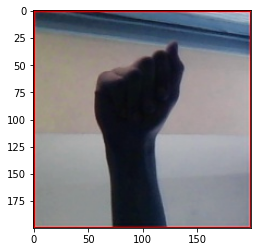

In [12]:
plt.imshow(image_list[0])

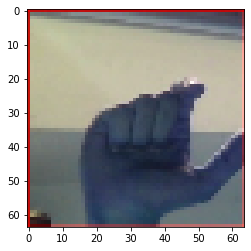

In [13]:
plt.imshow(preprocessed_image_list[0])

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
y = meta_data['label']
y.shape

(84000,)

In [16]:
X_train = np.array(preprocessed_image_list)

# ohe = OneHotEncoder()
# y_train = meta_data['label']
# y_train = y_train.reshape(-1,1)
# y_train = ohe.fit_transform(y_train)
# y_train = np.array(y_train)

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train = meta_data['label']
y_train = le.fit_transform(y_train)
# y_train = to_categorical(y_train, 28)

In [18]:
print(X_train.shape, y_train.shape)

(84000, 64, 64, 3) (84000,)


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [20]:
INPUT_SHAPE = X_train.shape[1:]
OUTPUT_SHAPE = len(labels)
print(INPUT_SHAPE, OUTPUT_SHAPE)

(64, 64, 3) 28


In [21]:
from tensorflow.keras import regularizers

In [22]:
    model = Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))

In [23]:
# model = Sequential()
# model.add(Conv2D(32, (5,5), activation='relu', input_shape=INPUT_SHAPE))
# model.add(MaxPool2D(2,2))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

In [24]:
es = EarlyStopping(monitor='accuracy', patience=1, restore_best_weights=True)

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
hist = model.fit(X_train, y_train, epochs=6, batch_size=64, validation_split=0.3, verbose=2, callbacks=[es])

Epoch 1/6
919/919 - 33s - loss: 0.9528 - accuracy: 0.7995 - val_loss: 0.4581 - val_accuracy: 0.9109
Epoch 2/6
919/919 - 18s - loss: 0.2220 - accuracy: 0.9749 - val_loss: 0.1966 - val_accuracy: 0.9671
Epoch 3/6
919/919 - 18s - loss: 0.1796 - accuracy: 0.9779 - val_loss: 0.1925 - val_accuracy: 0.9787
Epoch 4/6
919/919 - 18s - loss: 0.1335 - accuracy: 0.9884 - val_loss: 0.0975 - val_accuracy: 0.9935
Epoch 5/6
919/919 - 18s - loss: 0.1731 - accuracy: 0.9813 - val_loss: 0.2006 - val_accuracy: 0.9828


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

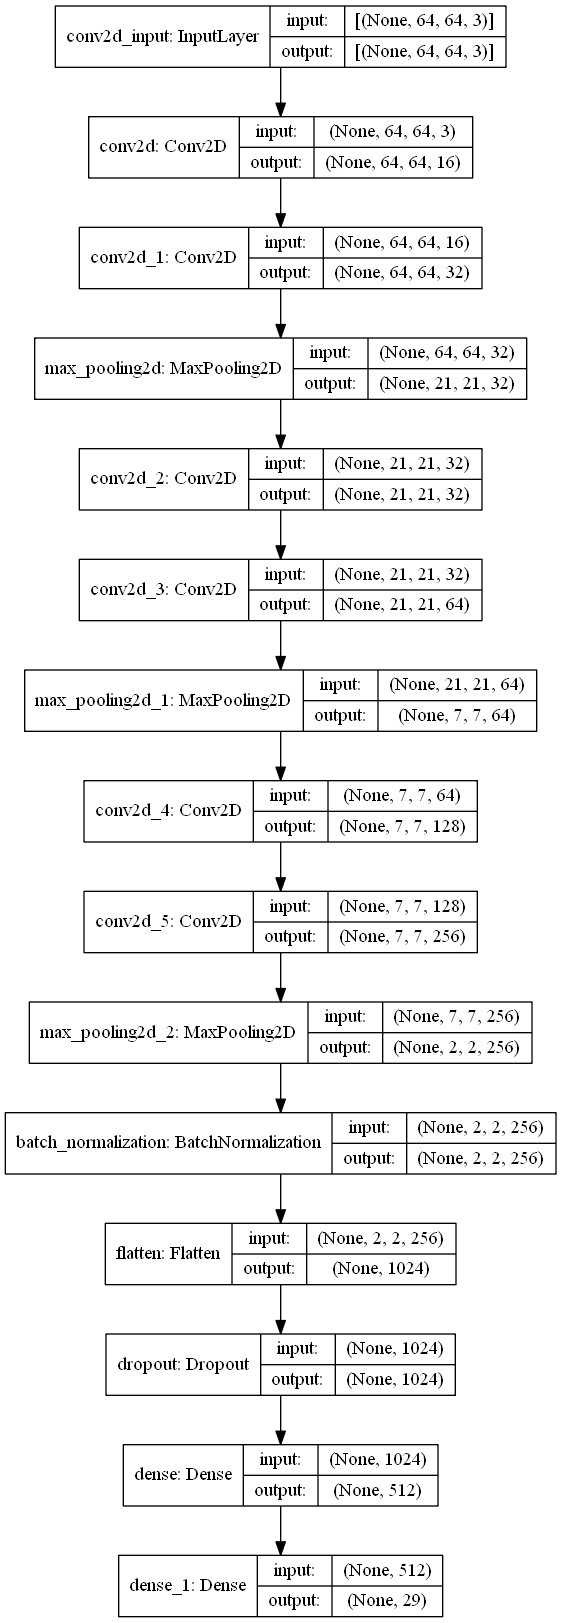

In [28]:
plot_model(model, show_shapes=True)

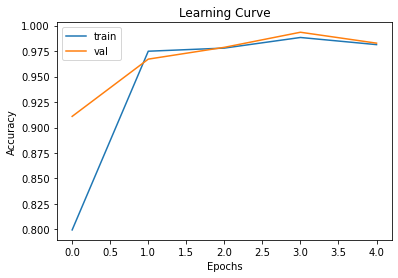

In [29]:
plt.title("Learning Curve")
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

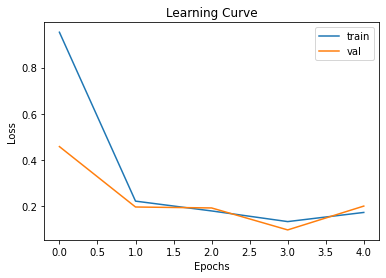

In [30]:
plt.title("Learning Curve")
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test


In [31]:
test_path = r'C:\Users\dariu\Jupyter Notebook\Sign Language Detection\asl_alphabet_test\asl_alphabet_test'

filename_list = []
image_list = []
label_list = []
for filename in os.listdir(test_path):
    file_path = test_path+f'\\{filename}'
    letter = label
    image = cv2.imread(file_path)
    filename_list.append(filename)
    image_list.append(image)
    label_list.append(letter)

In [32]:
len(filename_list)

28

In [33]:
len(image_list)

28

In [34]:
len(label_list)

28

In [35]:
file_path

'C:\\Users\\dariu\\Jupyter Notebook\\Sign Language Detection\\asl_alphabet_test\\asl_alphabet_test\\Z_test.jpg'

In [36]:
(image_list[0]).shape

(200, 200, 3)

In [37]:
test_meta_data = pd.DataFrame({'filename':filename_list, 'label':label_list, 'image':image_list})
print(test_meta_data.shape)
test_meta_data.head()

(28, 3)


,filename,label,image
0,A_test.jpg,space,"[[[255, 1, 1], [250, 0, 0], [247, 0, 2], [246,..."
1,B_test.jpg,space,"[[[255, 5, 0], [250, 1, 0], [246, 0, 4], [242,..."
2,C_test.jpg,space,"[[[251, 3, 0], [253, 4, 0], [245, 0, 2], [244,..."
3,D_test.jpg,space,"[[[251, 4, 0], [248, 3, 0], [240, 0, 6], [241,..."
4,E_test.jpg,space,"[[[252, 5, 0], [250, 4, 0], [243, 0, 7], [239,..."


In [38]:
test_meta_data =test_meta_data.sample(frac=1).reset_index(drop=True)
test_meta_data.head()

,filename,label,image
0,I_test.jpg,space,"[[[252, 2, 0], [251, 5, 0], [240, 0, 0], [243,..."
1,K_test.jpg,space,"[[[252, 3, 0], [255, 9, 0], [240, 0, 0], [243,..."
2,V_test.jpg,space,"[[[251, 2, 0], [255, 9, 0], [239, 0, 0], [242,..."
3,M_test.jpg,space,"[[[255, 6, 0], [251, 4, 0], [247, 2, 0], [246,..."
4,U_test.jpg,space,"[[[252, 2, 0], [254, 6, 0], [244, 0, 0], [243,..."


In [39]:
preprocessed_test_image_list = []
for image in test_meta_data['image']:
    img = preprocess_image(image)
    preprocessed_test_image_list.append(img)

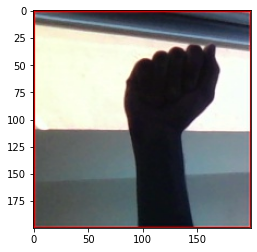

In [40]:
plt.imshow(image_list[0])

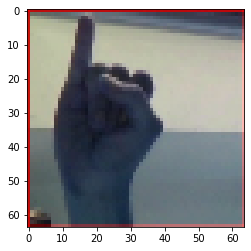

In [41]:
plt.imshow(preprocessed_test_image_list[0])

In [42]:
X_test = np.array(preprocessed_test_image_list)

y_test = test_meta_data['label']
y_test = le.transform(y_test)
# y_train = to_categorical(y_train, 28)

print(X_test.shape, y_test.shape)

(28, 64, 64, 3) (28,)


In [43]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 23.4866 - accuracy: 0.0357


# Predict

In [44]:
model.save('sign_lang_detect_model.h5')

In [45]:
from tensorflow.keras.models import load_model
model = load_model('sign_lang_detect_model.h5')

In [50]:
def classify(image):
    image = preprocess_image(image)
    image = image.reshape(1,64,64,3)
    pred = model.predict([image])
    idx = np.argmax(pred)
    if idx == 26 or idx==27:
        return ''
    else:
        return labels[idx]

In [51]:
test_image = cv2.imread(r'C:\Users\dariu\Desktop\WIN_20210919_06_57_22_Pro.jpg')
classify(test_image)

'I'

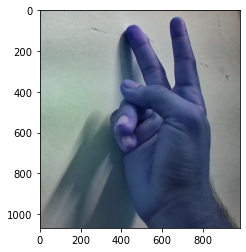

In [52]:
plt.imshow(test_image)

In [53]:
cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()
    
    image2 = cv2.imread('amer_sign2.png')
    cv2.imshow('image', image2)
    
    frame = cv2.flip(frame, 1)
    top, right, bottom, left = 75, 350, 300, 590
    roi = frame[top:bottom, right:left]
    roi=cv2.flip(roi,1)
    cv2.imshow('roi',roi)
    alpha=classify(roi)
    cv2.rectangle(frame, (left, top), (right, bottom), (0,255,0), 2)
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,alpha,(0,130),font,5,(0,0,255),2)
    #cv2.resize(img,(1000,1000))
    cv2.imshow('img',frame)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()